## Calculating probabilities

### Sales Performance Review


1. You manage a sales team and need to review Amir's performance. To do this, you'll randomly select a few deals he worked on last year for deeper analysis. Before selecting, calculate the probability of picking specific deals.

In [16]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt


In [17]:
# get the dataset
amir_deals = pd.read_csv("../dataset/amir_deals.csv")

# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts/amir_deals.shape[0]
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


### Randomly Sampling Deals

2. You need to randomly select five deals Amir worked on to contact customers for feedback. You'll do this both with and without replacement while ensuring the process is reproducible using a random seed.

In [18]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [19]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace = True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


### Creating a Probability Distribution

A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. You'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the `restaurant_groups` DataFrame.

In [20]:
# Creating the DataFrame
data = {
    'group_id': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'group_size': [2, 4, 6, 2, 2, 2, 3, 2, 4, 2]
}

restaurant_groups = pd.DataFrame(data)

# Display the DataFrame
print(restaurant_groups)


  group_id  group_size
0        A           2
1        B           4
2        C           6
3        D           2
4        E           2
5        F           2
6        G           3
7        H           2
8        I           4
9        J           2


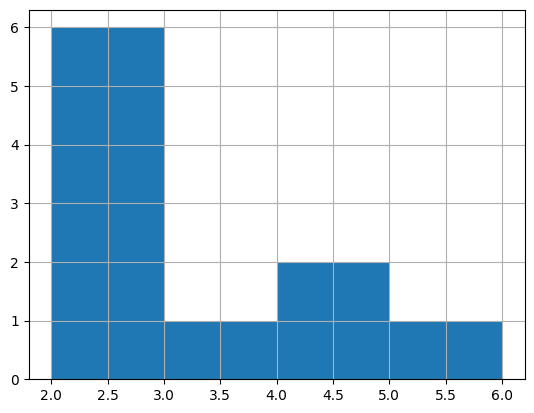

In [21]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2, 3, 4, 5, 6])
plt.show()

In [22]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

0.30000000000000004


### Data back-ups

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

In [23]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [24]:
# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)

0.16666666666666666


In [25]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0 , 30)
print(prob_greater_than_5)

0.8333333333333334


In [26]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0, 30) 
print(prob_between_10_and_20)

0.3333333333333333


> There's a 33% chance that Amir will wait 10-20 minutes.

### Simulating wait times

To give Amir a better idea of how long he'll have to wait, we'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. His minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

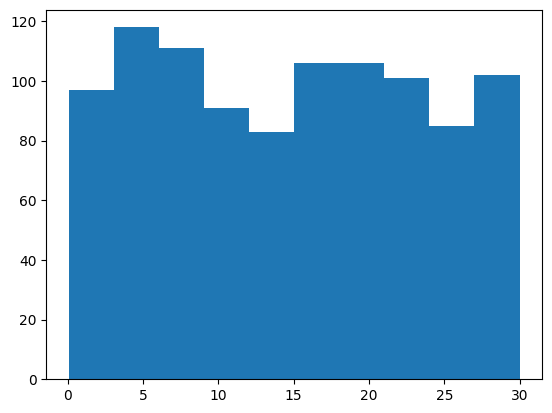

In [27]:
# Set random seed to 334
np.random.seed(334)

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

> Unless Amir figures out exactly what time each backup happens, he won't be able to time his data entry so it gets backed up sooner, but it looks like he'll wait about 15 minutes on average.

## Normal Distribution

**Distribution of Amir's sales**

Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of `amir_deals` As part of Amir's performance review, we want to be able to estimate the probability of him selling different amounts, but before we can do this, we'll need to determine what kind of distribution the amount variable follows.



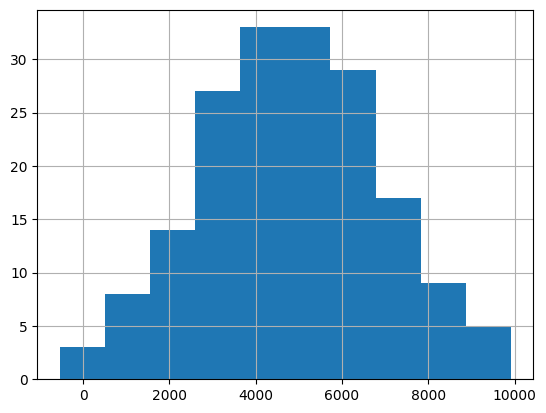

In [28]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins=10)
plt.show()

Amir's sales follows a **Normal Distribution**

In [40]:
amir_deals['amount'].describe()

count     178.000000
mean     4812.000337
std      2058.173225
min      -539.230000
25%      3415.927500
50%      4805.190000
75%      6217.257500
max      9913.270000
Name: amount, dtype: float64

What's the probability of Amir closing a deal worth less than $7500?

In [ ]:
# Probability of deal < 7500
from scipy.stats import norm
prob_less_7500 = norm.cdf(7500, 5000, 2000)             # norm.cdf(k, mean, std)

print(prob_less_7500)

0.8943502263331446


What's the probability of Amir closing a deal worth more than $1000?

In [31]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

print(prob_over_1000)

0.9772498680518208


What's the probability of Amir closing a deal worth between $3000 and $7000?

In [32]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

print(prob_3000_to_7000)

0.6826894921370859


What amount will 25% of Amir's sales be less than?

In [33]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

3651.0204996078364


We can count on Amir 75% (1-0.25) of the time to make a sale worth at least $3651.02. This information could be useful in making company-wide sales projections.

## Simulating sales under new market conditions

The company's financial analyst is predicting that next quarter, the worth of each sale will increase by **20% **and the volatility, or standard deviation, of each sale's worth will increase by** 30%**. To see what Amir's sales might look like next quarter under these new market conditions, we'll simulate new sales amounts using the normal distribution and store these in the `new_sales` DataFrame

In [43]:
# Calculate new average amount
new_mean = 5000 + (0.2* 5000)

# Calculate new standard deviation
new_sd = 2000 + (0.3 * 2000)

In [48]:
print("new mean:",new_mean,'\n',"new sd:",new_sd)

new mean: 6000.0 
 new sd: 2600.0


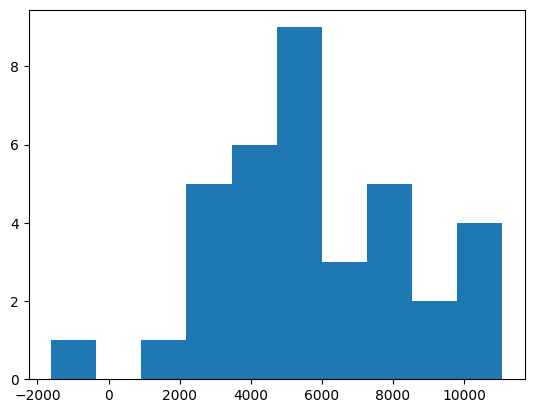

In [49]:
# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

Although the average sale amount went up, the variation also increased, so it's not straightforward to decide whether these sales are better than his current ones. 

**Which market is better?**

The key metric that the company uses to evaluate salespeople is the percent of sales they make over $1000 since the time put into each sale is usually worth a bit more than that, so the higher this metric, the better the salesperson is performing.

Recall that Amir's current sales amounts have a mean of $5000 and a standard deviation of $2000, and Amir's predicted amounts in next quarter's market have a mean of $6000 and a standard deviation of $2600.

Based only on the metric of percent of sales over $1000, does Amir perform better in the current market or the predicted market?

In [51]:
(1- norm.cdf(1000, 6000, 2600)) * 100

np.float64(97.27648049862613)

In [53]:
(1- norm.cdf(1000, 5000, 2000)) * 100

np.float64(97.72498680518208)

In the current market, Amir makes sales over $1000 about 97.7% of the time, and about 97.3% of the time in the predicted market, so there's not much of a difference. However, his average sale amount is higher in the predicted market, so your company may want to consider other metrics as well.

# Central Limit Theorem

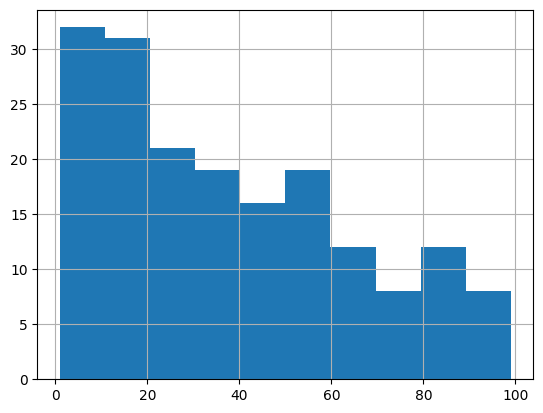

In [54]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

In [55]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace=True)

# Take mean of samp_20
print(samp_20.mean())

32.0


Even though the distribution of num_users is not normal, the distribution of its sample means resembles the normal distribution.

In [59]:
# # Set seed to 321
# np.random.seed(321)

# sample_means = []
# # Loop 30 times to take 30 means
# for i in range(30):
#   # Take sample of size 20 from num_users col of all_deals with replacement
#   cur_sample = all_deals['num_users'].sample(20, replace=True)
#   # Take mean of cur_sample
#   cur_mean = cur_sample.mean()
#   # Append cur_mean to sample_means
#   sample_means.append(cur_mean)

# # Print mean of sample_means
# print(np.mean(sample_means))

# # Print mean of num_users in amir_deals
# print(amir_deals['num_users'].mean())

Amir's average number of users is very close to the overall average, so it looks like he's meeting expectations.

## Poisson Distribution

### Tracking lead responses

The company uses software to manage sales leads, placing them in a queue for follow-up whenever someone is available. Since the number of leads Amir responds to in a day is a countable event over time, it follows a Poisson distribution. Amir replies to about 4 leads per day on average. We'll find the chances of him responding to different numbers of leads.

 1. Calculate the probability that Amir responds to 5 leads in a day, given that he responds to an average of 4.

In [1]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

print(prob_5)

0.1562934518505317


2. Amir's coworker responds to an average of 5.5 leads per day. What is the probability that she answers 5 leads in a day?

In [3]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

print(prob_coworker)

0.17140068409793663


3. What's the probability that Amir responds to 2 or fewer leads in a day?

In [4]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

print(prob_2_or_less)

0.2381033055535443


4. What's the probability that Amir responds to more than 10 leads in a day?

In [5]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

print(prob_over_10)

0.0028397661205137315


## Exponential Distribution

### Modeling time between leads

To further evaluate Amir's performance, we want to know how much time it takes him to respond to a lead after he opens it. On average, he responds to 1 request every 2.5 hours. We'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

1. What's the probability it takes Amir less than an hour to respond to a lead?

In [6]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


2. What's the probability it takes Amir more than 4 hours to respond to a lead?

In [7]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

0.20189651799465536


3. What's the probability it takes Amir 3-4 hours to respond to a lead?

In [8]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684


#### Correlation and Experimental Design

**Relationships between variables**

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

world_happiness = pd.read_csv("../dataset/world_happiness.csv")

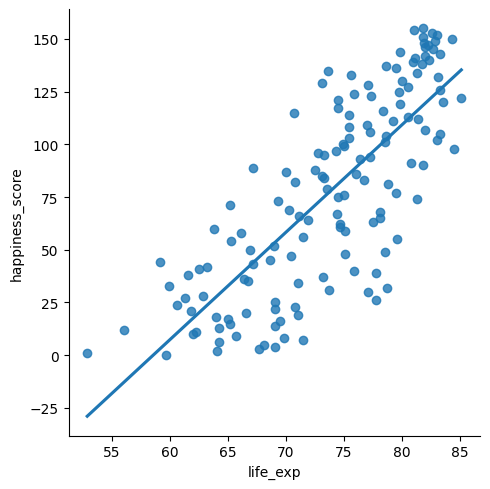

In [16]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

In [17]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

0.7802249053272065


#### Correlation Caveats

Although correlation is a valuable tool for quantifying relationships between variables, it comes with important limitations. For example, two variables might share a quadratic (non-linear) relationship, which correlation would fail to capture accurately. The correlation coefficient specifically measures the strength of linear relationships — and only linear ones.

In other words, correlation reflects only linear associations.

As with any summary statistic, it's important not to rely on correlation blindly. Whenever possible, you should visualize your data to better understand the true nature of the relationships.

When data is highly skewed, we can apply a log transformation. 

**Transformations**

Besides using a log transformation, there are many other ways to make a relationship look more linear, like taking the square root or the reciprocal of a variable. Which transformation you choose depends on the data and how skewed it is. You can also mix and match — for example, you might take the log of both x and y, or use a square root for x and a reciprocal for y.

> Why use a transformation?

Some statistical methods, like calculating a correlation coefficient or doing linear regression, assume that the variables are related in a straight-line (linear) way. Transformations help make the relationship more linear so that these methods can be used properly.

> Correlation doesn’t mean causation.

Just because two variables are correlated doesn’t mean one causes the other. For example, there’s a very high correlation between margarine consumption and the divorce rate in Maine — but eating more margarine obviously doesn’t cause more divorces. This type of misleading connection is called a spurious correlation.

> Confounding

Sometimes, a hidden third factor can create a misleading correlation — this is called confounding. For example, coffee drinking and lung cancer may seem related, but smoking is the real cause. Smokers tend to drink more coffee, and smoking causes lung cancer. So, coffee doesn’t cause lung cancer; the connection is due to the confounding effect of smoking.

Another example is holidays and retail sales. Sales may go up during holidays, but special deals and promotions also drive purchases, making it hard to tell the true cause.

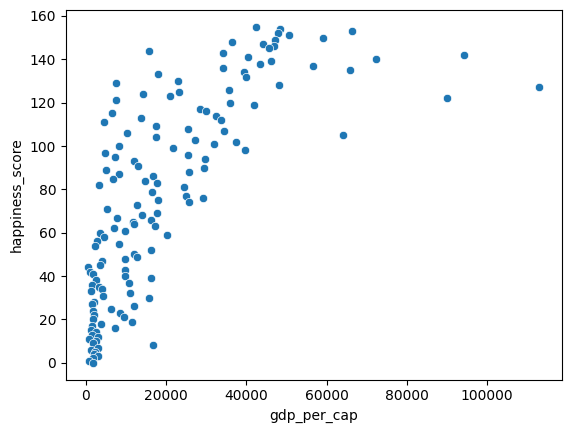

0.7279733012222978


In [20]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(data=world_happiness, x='gdp_per_cap', y='happiness_score')
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

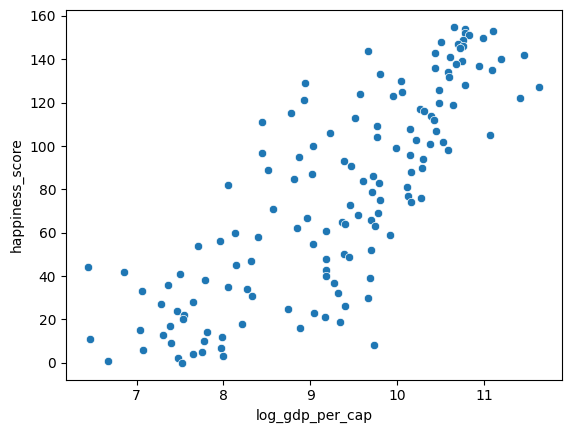

0.8043146004918288


In [19]:
# Transforming variables

import numpy as np

# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(data=world_happiness, x='log_gdp_per_cap', y='happiness_score')
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

**Confounders**

A study is investigating the relationship between neighborhood residence and lung capacity. Researchers measure the lung capacity of thirty people from neighborhood A, which is located near a highway, and thirty people from neighborhood B, which is not near a highway. Both groups have similar smoking habits and a similar gender breakdown.

Which of the following could be a confounder in this study?

- Lung capacity
- Neighborhood
- **Air pollution** <-
- Smoking status
- Gender

We would expect there to be more air pollution in the neighborhood situated near the highway, which can cause lower lung capacity.

### Design of Experiments

Data is often collected through studies designed to answer specific questions. How we analyze and interpret the data depends on how it was collected and how the study was set up.

> Key Terms

Experiments usually focus on questions like, "What is the effect of the treatment on the response?" 

- Treatment: Explanatory (independent) variable
- Response: Dependent variable

For example: "What is the effect of an advertisement on product sales?" 
In this case, 
- Treatment: The advertisement
- Response: Number of products purchased

### Controlled Experiments

In a controlled experiment, participants are randomly assigned to either a treatment group or a control group. The treatment group receives the treatment, while the control group does not. A common example is an A/B test — for instance, one group sees an advertisement (treatment group), and the other does not (control group).

The two groups should be as similar as possible, except for the treatment, so we can fairly judge its effect. If the groups differ in important ways — like age — it can cause confounding or bias. 

For example, if the treatment group’s average age is 25 and the control group’s is 50, and younger people tend to buy more, we might wrongly conclude that the advertisement was effective, when the real reason was the age difference.



### Gold Standard of Experiments

The ideal experiment aims to eliminate as much bias as possible.

Key tools used to reduce bias:

> Randomized Controlled Trial (RCT)

Participants are randomly assigned to treatment or control groups based purely on chance. Ensures groups are comparable and reduces bias.

> Placebo

Participants receive something that looks like the treatment but has no effect. Prevents participants from knowing if they’re in the treatment or control group. Ensures any effects are due to the treatment, not just the belief of receiving it.

> Double-Blind Experiment

Neither the participant nor the experimenter knows who received the treatment or placebo. Protects against bias in administering treatments and analyzing results.

Main Principle:
Fewer opportunities for bias lead to more reliable conclusions about whether the treatment truly affects the response.

### Observational Studies

- Participants are not randomly assigned to groups; they self-select based on existing characteristics.
- Useful when controlled experiments are not possible (e.g., studying the effects of smoking).

> Limitation

- Can't establish causation, only association.
- Potential for confounding, since groups may differ in important ways.

> Mitigation

Statistical methods can control for some confounding factors to strengthen conclusions.

### Longitudinal vs. Cross-Sectional Studies

> Longitudinal Study

- Follows the same participants over time.
- Tracks changes and reduces confounding by birth year or lifestyle differences.
- More accurate but expensive and time-consuming.

> Cross-Sectional Study

- Collects data at a single point in time across different groups.
- Quicker, cheaper, but more prone to confounding (e.g., generational effects).
- Example: measuring heights of different age groups at one time instead of following individuals over years.

